# COMP 7150 Assignment 2

**Due at midnight Tuesday Feb 21, 2023**


NAME: _______________

---

**How each problem is graded**

This is a general guideline.  There might be some variant for a specific problem.

* Answering the question in English: 25%
    + Thorough answering the question, explaning the findings, discussing the comparison: 10-25%
    + Not answering the question in English: 0%.
    + Note: An answer is written in English to address a specific question. The answer must come first.  
* Code: 50%
    + Code is correct: 50%
    + Code is correct, but missing some minor elements: 25-40%
    + Incorrect solution, but make an effort: 10%-25%
    + Empty: 0% 
    + Note: code is not an answer. Code shows how you get an answer.  Code comes after an answer.
* Explanation of code: 10%
    + Concise English explanation of solution/code: 10%
    + No explanation: 0%
* Testing: 15%
    + Providing adequate testing of code: 15%
    + Code operational but does not show how the answer(s) were generated: 5%
    + Code not runnable or no testing: 0%


**How to turn in your assignment**

+ Export your notebook to an HTML file.
+ Upload it to the appropriate folder in Assignments on Canvas.

**Each problem is worth 15 points**

This assignment uses the movielens dataset.  You can start with the code below.

In [1]:
import pandas as pd
movies=pd.read_csv('./../Sem_2/Movielens_assignment/datasets/movies.csv')
users=pd.read_csv('./../Sem_2/Movielens_assignment/datasets/users.csv')
ratings=pd.read_csv('./../Sem_2/Movielens_assignment/datasets/ratings.csv')


In [2]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
users.head()

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [4]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [5]:
movielens=pd.merge(pd.merge(ratings,users,on='user_id'),movies,on='movie_id')
movielens.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


---

**Problem 1**

What are the top-10 best rated genres?

Explain the steps you carry out to get the answer and report your finding.

In [6]:
movielens.groupby('genres',as_index=False)['rating'].mean().sort_values(by='rating',ascending=False).rename(columns={'rating':'Average Rating'})[:10]

,genres,Average Rating
155,Animation|Comedy|Thriller,4.473837
297,Sci-Fi|War,4.449890
143,Animation,4.394336
268,Film-Noir|Mystery,4.367424
141,Adventure|War,4.346107
270,Film-Noir|Romance|Thriller,4.294382
21,Action|Adventure|Drama|Sci-Fi|War,4.292977
271,Film-Noir|Sci-Fi,4.273333
226,Crime|Film-Noir,4.264129
266,Film-Noir,4.258105


---

**Problem 2**

Here we are only interested in popular genres, each of which has at least 5000 ratings.

What are the top-5 best rated genres among these popular genres?

Explain the steps you carry out to get the answer, and report your finding.

In [7]:
popular_atleast_5k_ratings=movielens.groupby('genres',as_index=False)['rating'].count().sort_values(by='rating',ascending=False).rename(columns={'rating':'Genre Count'})

popular_genres=popular_atleast_5k_ratings[popular_atleast_5k_ratings['Genre Count'].apply(lambda x: x>=5000)]['genres'][:5].to_list()

popular_atleast_5k_ratings[popular_atleast_5k_ratings.isin(popular_genres)]

,genres,Genre Count
176,Comedy,NaN
239,Drama,NaN
207,Comedy|Romance,NaN
185,Comedy|Drama,NaN
252,Drama|Romance,NaN
...,...,...
257,NaN,NaN
170,NaN,NaN
195,NaN,NaN
267,NaN,NaN


---

**Problem 3**

Among the top-5 best rated genres you found in the previous problem, what are the top-20 best rated movies, each of which has at least 100 reviews?

Explain the steps you carry out to get the answer, and report your finding.

In [8]:
best_rated_movies_among_popular_genres=movielens[movielens['genres'].isin(popular_genres)].groupby('title',as_index=False)['rating'].agg(['count','mean']).reset_index().rename(columns={'count':'Rating Count','mean':'Average rating'})

top_20_best_rated_movies=best_rated_movies_among_popular_genres[best_rated_movies_among_popular_genres['Rating Count'].apply(lambda x : x>=100)]\
.sort_values(by='Average rating',ascending=False)[:20]

top_20_best_rated_movies_list=top_20_best_rated_movies['title'].to_list()

top_20_best_rated_movies

,title,Rating Count,Average rating
1343,"Shawshank Redemption, The (1994)",2227,4.554558
1523,To Kill a Mockingbird (1962),928,4.425647
1105,One Flew Over the Cuckoo's Nest (1975),1725,4.390725
311,Citizen Kane (1941),1116,4.388889
572,"General, The (1927)",206,4.368932
165,"Bicycle Thief, The (Ladri di biciclette) (1948)",252,4.357143
984,Monty Python and the Holy Grail (1974),1599,4.335210
842,Life Is Beautiful (La Vita � bella) (1997),1152,4.329861
767,Jean de Florette (1986),216,4.324074
12,"400 Blows, The (Les Quatre cents coups) (1959)",187,4.320856


---

**Problem 4**

Visualize the popularity (rating count) versus quality (average rating) of the top-20 best-rated movies you found in the previous problem.

Explain the steps you carry out to get the answer, and report your finding. In particular, draw some conclusions about movies that are both popular and highly rated.



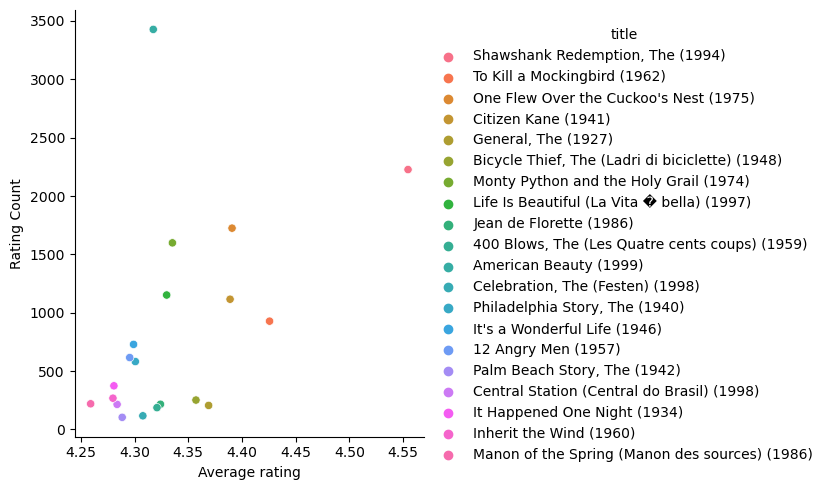

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.relplot(kind='scatter',data=top_20_best_rated_movies,x='Average rating',y='Rating Count',hue='title')

---

**Problem 5**

Based on your findings in the previous problem, recommend 4 movies that your friends should see.  Provide a simple justification for your recommendation based on your analysis.

From the above we can recommend
1) Shawshank Redemption, The (1994) as it has the highest rating
2) American Beauty (1999) as more people watched and rated it well.
3) One Flew Over the Cuckoo's Nest (1975)
4) Monty Python and the Holy Grail (1974)	

---

**Problem 6**

Among the 4 movies you recommended, on average, which ones are preferred by males and which ones are prefered by females?

Explain the steps you carry out to get the answer, and report your finding.

In [10]:
preferred_movie_list=['Shawshank Redemption, The (1994)','American Beauty (1999)',"One Flew Over the Cuckoo's Nest (1975)",'Monty Python and the Holy Grail (1974)']

movielens[movielens['title'].isin(preferred_movie_list)].groupby(['title','gender'],as_index=False)['rating'].agg(['count','mean']).rename(columns={'count':'Count','mean':'Average Rating'})

Count  Average Rating
title                                  gender                       
American Beauty (1999)                 F         946        4.238901
                                       M        2482        4.347301
Monty Python and the Holy Grail (1974) F         352        4.235795
                                       M        1247        4.363272
One Flew Over the Cuckoo's Nest (1975) F         444        4.310811
                                       M        1281        4.418423
Shawshank Redemption, The (1994)       F         627        4.539075
                                       M        1600        4.560625

**
Comparing discretely among different genders
1) Men preferred `American Beauty (1999)` and `Shawshank Redemption, The (1994)`
2) Woman preferred `Monty Python and the Holy Grail (1974)` and `One Flew Over the Cuckoo's Nest (1975)`

---

**Problem 7**

Among the 4 movies you recommended, on average, (A) which movie is most liked by the 18 age-group?  (B) which movie is most liked by all age groups?


Explain the steps you carry out to get the answer, and report your finding.

In [11]:
movielens['eighteen']=movielens['age'].apply(lambda x : 'Yes' if x==18 else "No")

movielens[movielens['title'].isin(preferred_movie_list)].groupby(['title','eighteen'],as_index=False)['rating'].agg(['count','mean']).rename(columns={'count':'Count','mean':'Average Rating'})

Count  Average Rating
title                                  eighteen                       
American Beauty (1999)                 No         2713        4.263546
                                       Yes         715        4.521678
Monty Python and the Holy Grail (1974) No         1289        4.317300
                                       Yes         310        4.409677
One Flew Over the Cuckoo's Nest (1975) No         1476        4.379404
                                       Yes         249        4.457831
Shawshank Redemption, The (1994)       No         1763        4.522972
                                       Yes         464        4.674569

**
1) Among 18 age group American Beauty (1999) and Shawshank Redemption, The (1994) are more liked than the others
2) In all age groups American Beauty (1999) and Shawshank Redemption, The (1994) are also mostly liked 